In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
import io


df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [7]:
df.shape

(800, 22)

In [10]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [14]:
df['age'] = df['age'].astype(int)

In [15]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [16]:
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("--" * 20)

A1_Score [1 0]
----------------------------------------
A2_Score [0 1]
----------------------------------------
A3_Score [1 0]
----------------------------------------
A4_Score [0 1]
----------------------------------------
A5_Score [1 0]
----------------------------------------
A6_Score [0 1]
----------------------------------------
A7_Score [1 0]
----------------------------------------
A8_Score [0 1]
----------------------------------------
A9_Score [1 0]
----------------------------------------
A10_Score [1 0]
----------------------------------------
gender ['f' 'm']
----------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice ['no' 'yes']
----------------------------------------
austim ['no' 'yes']
----------------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 '

In [17]:
df = df.drop(columns = ['ID', 'age_desc'])

In [18]:
df.shape

(800, 20)

In [19]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [20]:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong": "China"
}

df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [21]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [22]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [23]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [24]:
sns.set_theme(style = 'darkgrid')

Age Mean:  27.96375
Age Median:  24.0


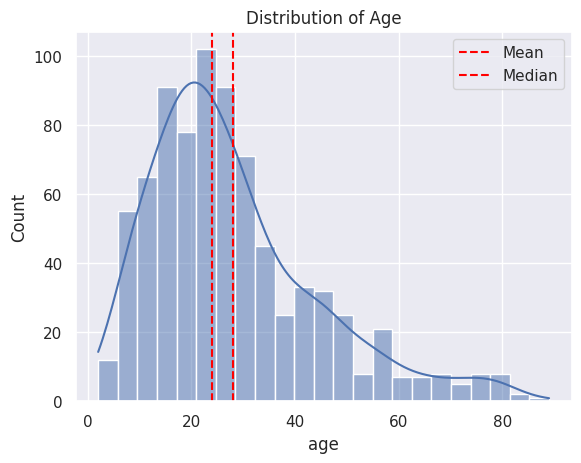

In [25]:
sns.histplot(df['age'], kde = True)
plt.title("Distribution of Age")

age_mean = df['age'].mean()
age_median = df['age'].median()

print("Age Mean: ", age_mean)
print("Age Median: ", age_median)

plt.axvline(age_mean, color="red", linestyle = "--", label = "Mean")

plt.axvline(age_median, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()

Result Mean:  8.537303106501248
Result Median:  9.605299308


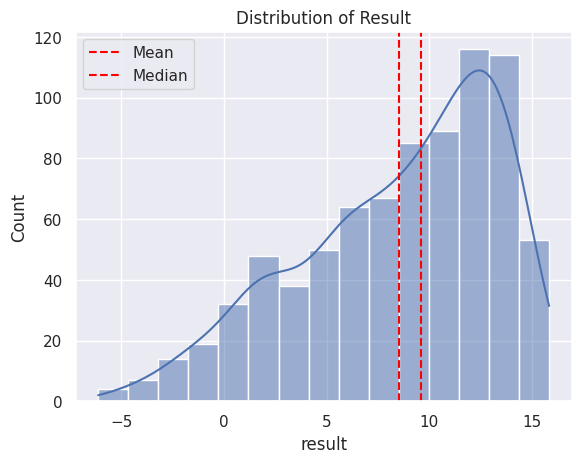

In [26]:
sns.histplot(df['result'], kde = True)
plt.title("Distribution of Result")

result_mean = df['result'].mean()
result_median = df['result'].median()

print("Result Mean: ", result_mean)
print("Result Median: ", result_median)

plt.axvline(result_mean, color="red", linestyle = "--", label = "Mean")

plt.axvline(result_median, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()

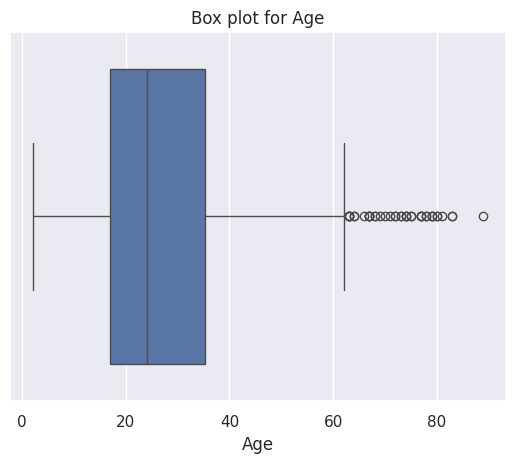

In [27]:
sns.boxplot(x = df['age'])
plt.title("Box plot for Age")
plt.xlabel("Age")
plt.show()


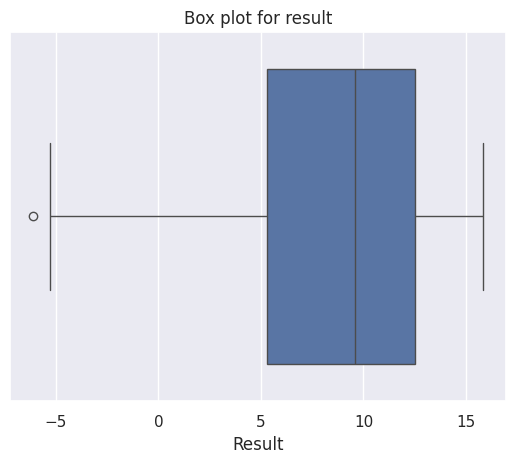

In [28]:
sns.boxplot(x = df['result'])
plt.title("Box plot for result")
plt.xlabel("Result")
plt.show()

In [29]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [30]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR  = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df['age']< lower_bound) | (df['age']> upper_bound)]

In [31]:
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -10.375
Upper Bound:  62.625


In [32]:
len(age_outliers)

39

In [33]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR  = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df['result']< lower_bound) | (df['result']> upper_bound)]

In [34]:
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -5.5052896818749995
Upper Bound:  23.326348605125


In [35]:
len(result_outliers)

1

In [36]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

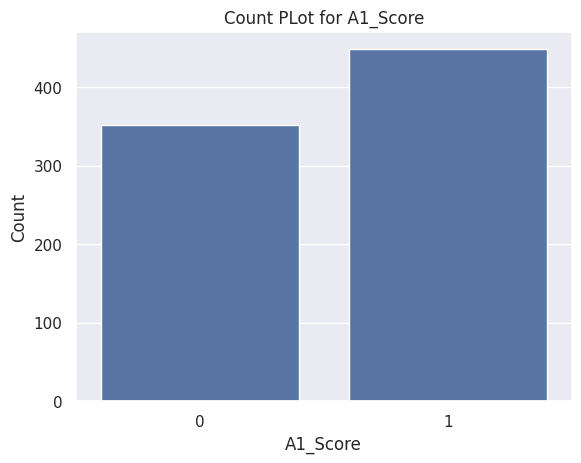

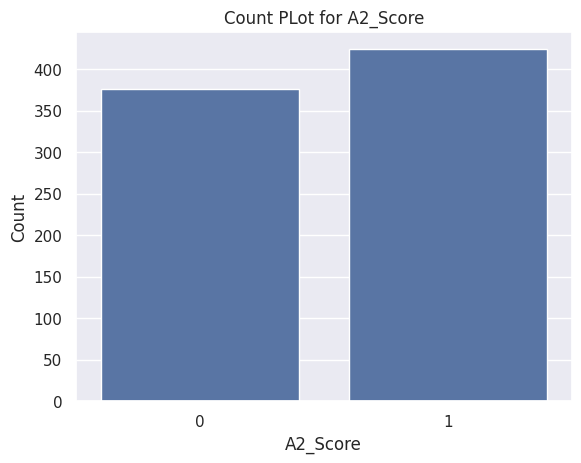

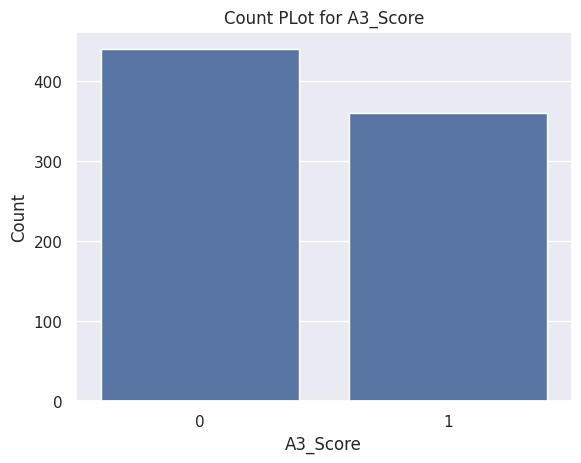

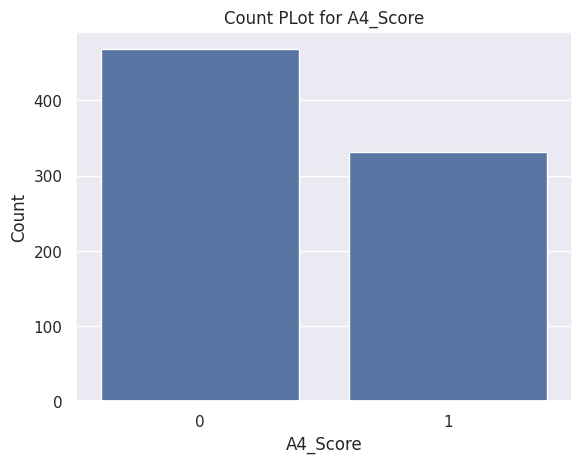

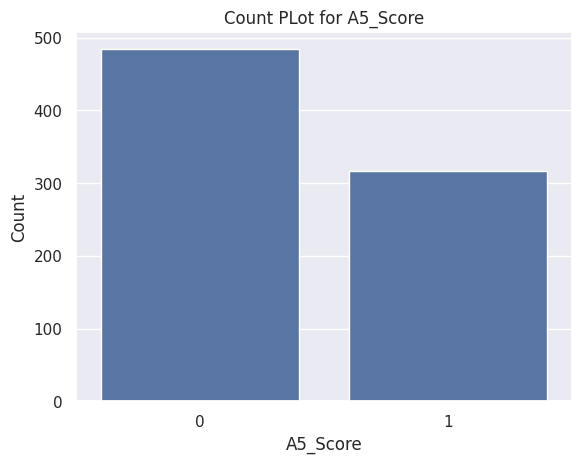

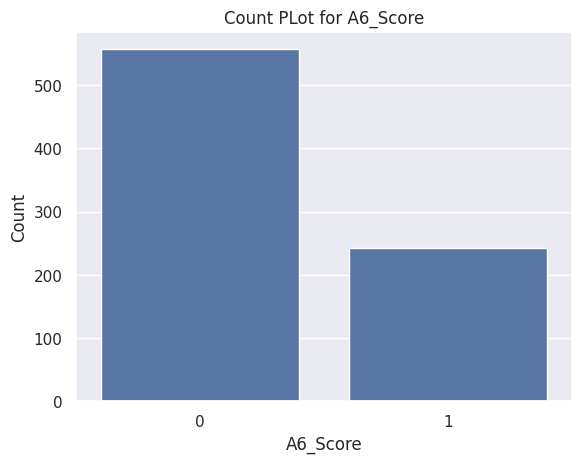

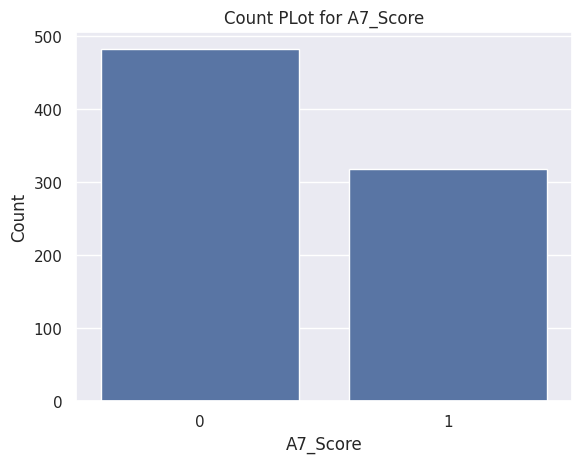

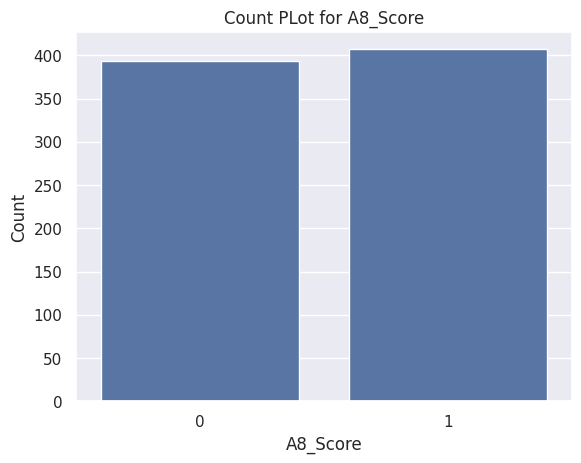

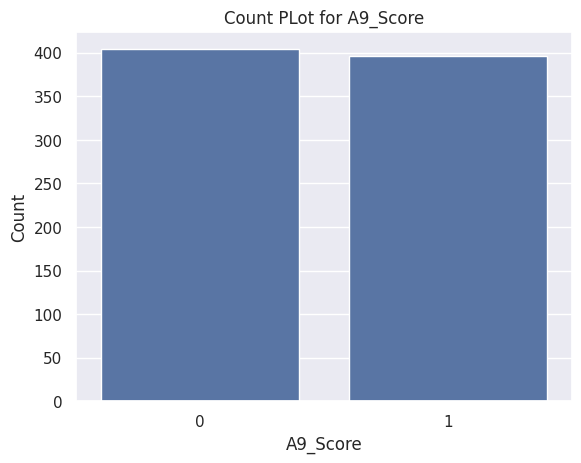

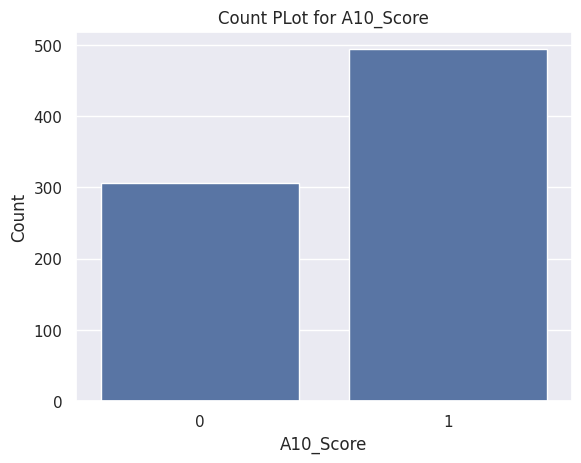

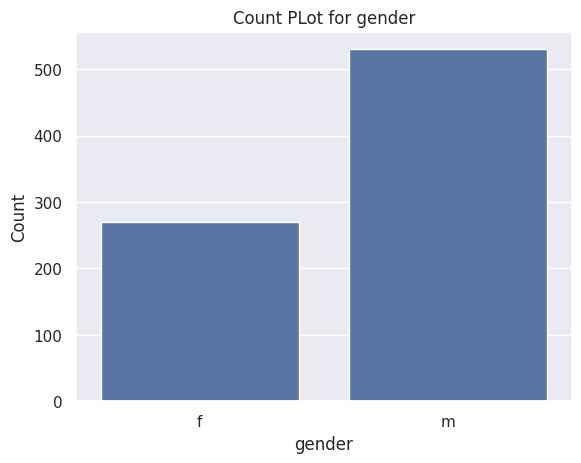

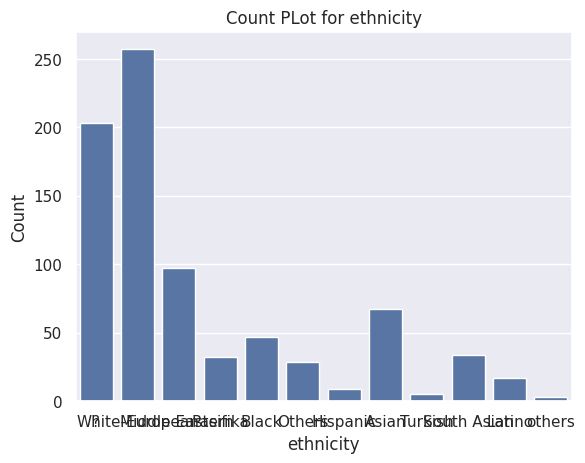

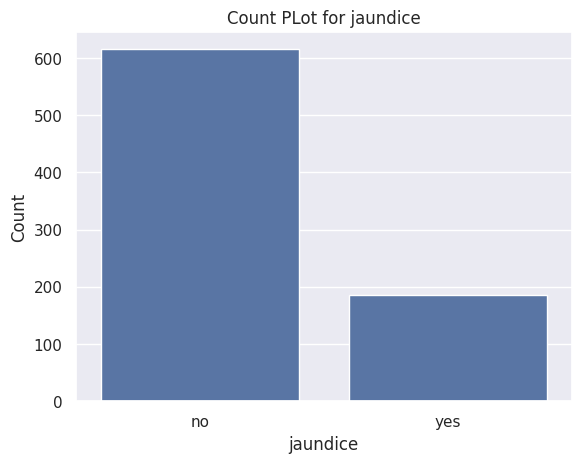

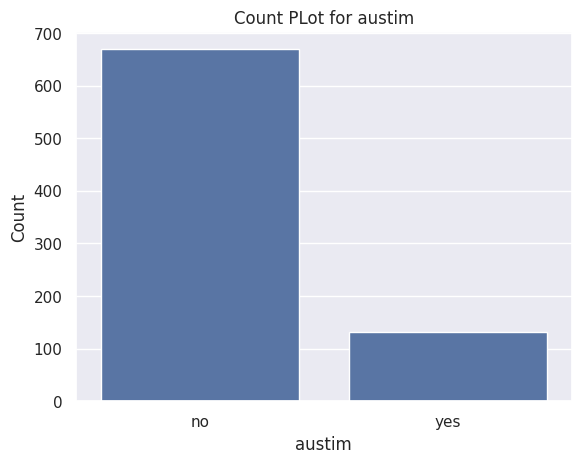

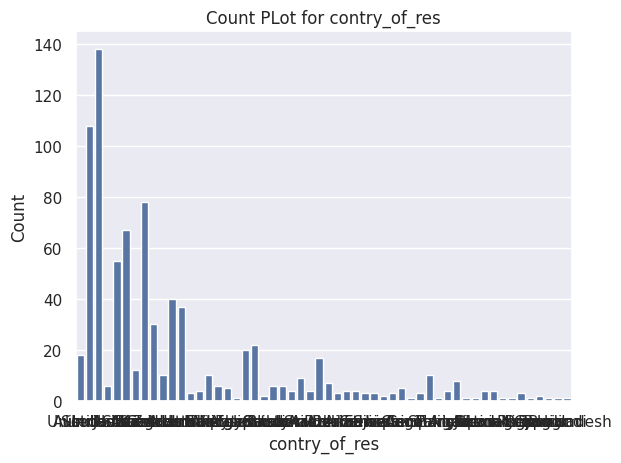

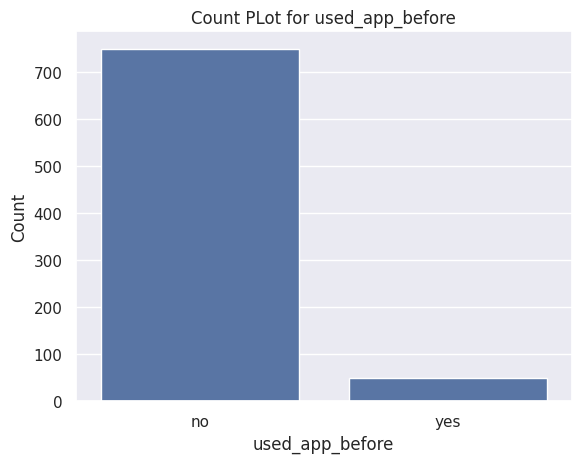

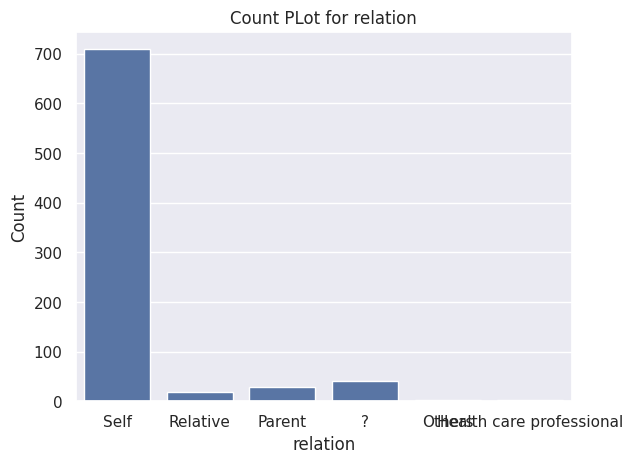

In [37]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
    sns.countplot(x = df[col])
    plt.title(f"Count PLot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

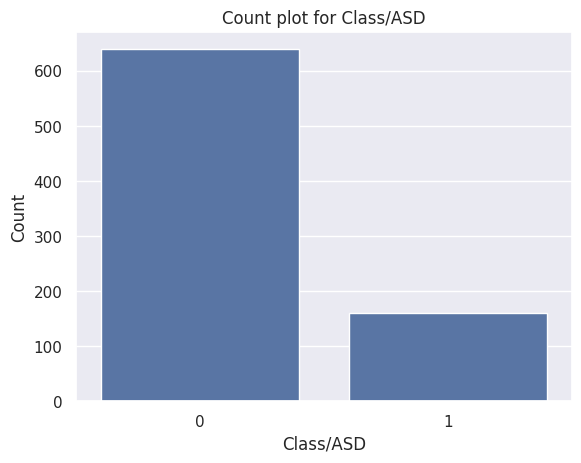

In [38]:
sns.countplot(x = df['Class/ASD'])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [39]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [40]:
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("--" * 20)

A1_Score [1 0]
----------------------------------------
A2_Score [0 1]
----------------------------------------
A3_Score [1 0]
----------------------------------------
A4_Score [0 1]
----------------------------------------
A5_Score [1 0]
----------------------------------------
A6_Score [0 1]
----------------------------------------
A7_Score [1 0]
----------------------------------------
A8_Score [0 1]
----------------------------------------
A9_Score [1 0]
----------------------------------------
A10_Score [1 0]
----------------------------------------
gender ['f' 'm']
----------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice ['no' 'yes']
----------------------------------------
austim ['no' 'yes']
----------------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 '

In [41]:
df['ethnicity'] = df['ethnicity'].replace({"?": "Others", "others": "Others"})

In [42]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [43]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [44]:
df['relation']  = df['relation'].replace(
{
    "?": "Others",
    "Relative": "Others",
    "Parent": "Others",
    "Health care professional": "Others"
})

In [45]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [46]:
object_columns = df.select_dtypes(include = ["object"]).columns

In [47]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [48]:
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column]  = label_encoder.fit_transform(df[column])
    encoders[column]  = label_encoder

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [49]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

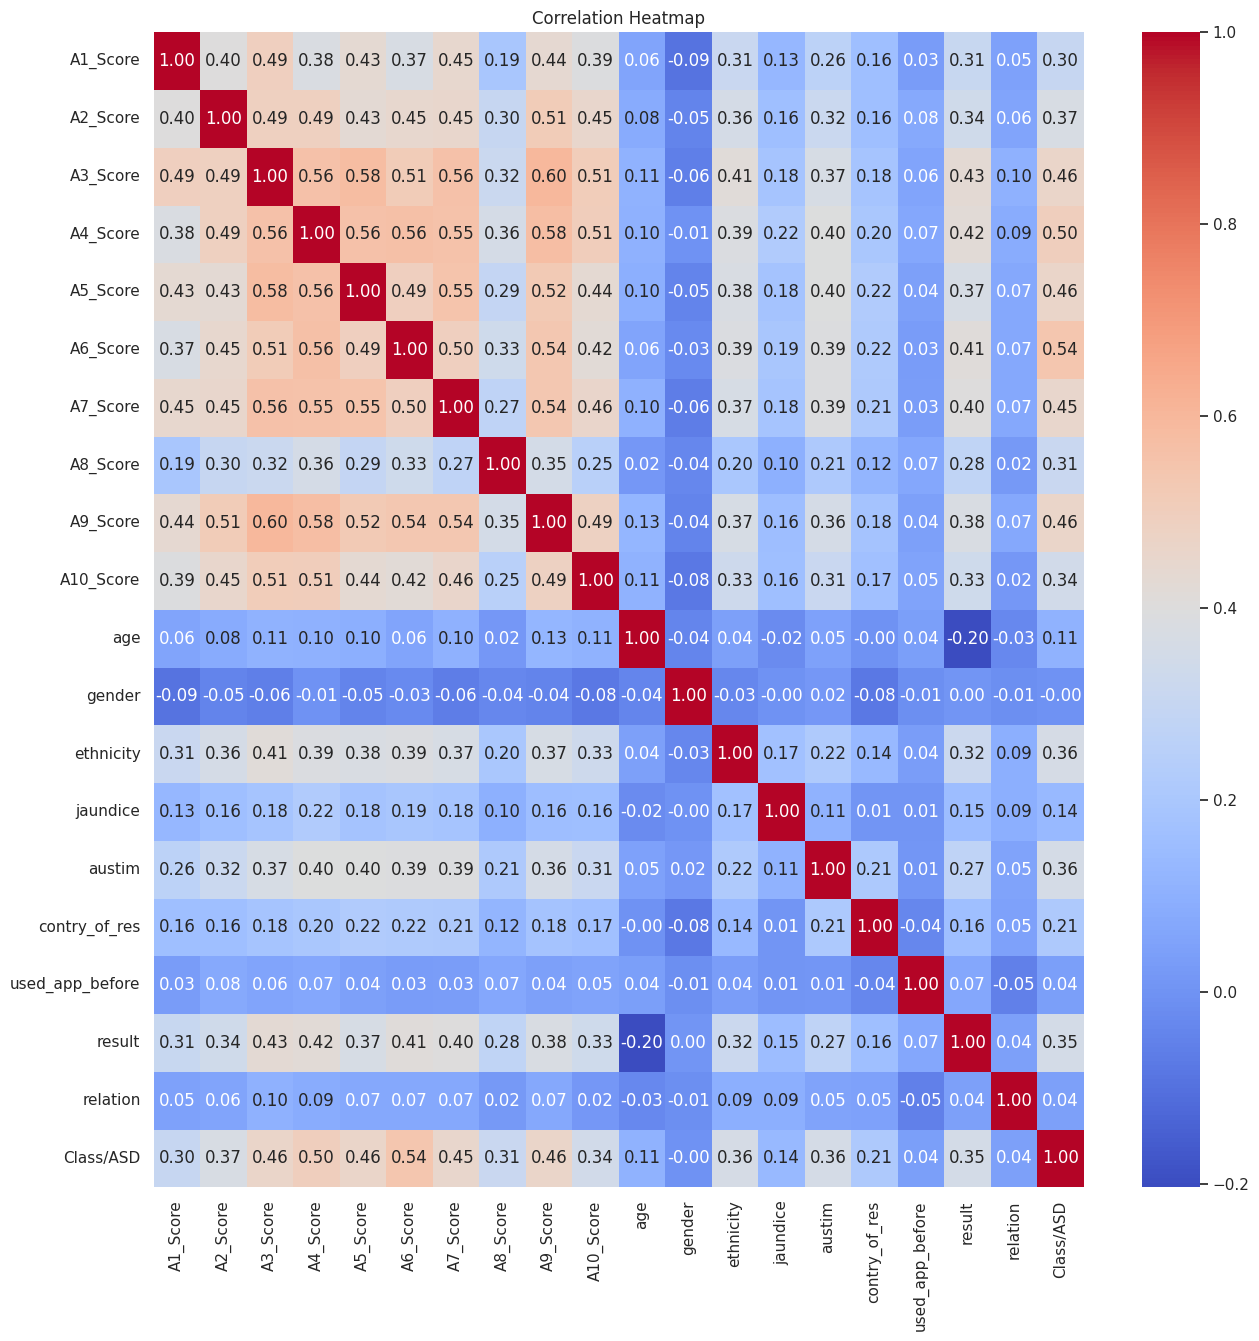

In [50]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [51]:
def replace_outlier_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR  = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = df[column].apply(lambda x : median if x < lower_bound or x > upper_bound else x)

    return df

In [52]:
df.shape

(800, 20)

In [53]:
df = replace_outlier_with_median(df, "age")
df = replace_outlier_with_median(df, "result")

In [54]:
df.shape

(800, 20)

In [55]:
X  = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
X_train.shape

(640, 19)

In [58]:
y_train.shape

(640,)

In [59]:
y_train.value_counts()


,count
Class/ASD,
0,515
1,125


In [60]:
smote = SMOTE(random_state=42)

In [61]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [62]:
y_train_smote.shape

(1030,)

In [63]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(random_state=42)
}

In [64]:
cv_scores = {}

for model_name, model in models.items():
    print(f"Trainig {model_name} with default parameters....")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross validation Accuarcy: {np.mean(scores): .2f}")
    print("--"* 20)

Trainig DecisionTreeClassifier with default parameters....
DecisionTreeClassifier Cross validation Accuarcy:  0.86
----------------------------------------
Trainig RandomForestClassifier with default parameters....
RandomForestClassifier Cross validation Accuarcy:  0.92
----------------------------------------
Trainig XGBClassifier with default parameters....
XGBClassifier Cross validation Accuarcy:  0.90
----------------------------------------


In [65]:
cv_scores

{'DecisionTreeClassifier': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'RandomForestClassifier': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBClassifier': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [66]:
(0.7961165 + 0.87864078 + 0.87378641 + 0.8592233 + 0.87378641)/5

0.85631068

In [67]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state = 42)

In [68]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth" : [None, 10, 20, 30, 50 ,70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]

}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth" : [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample" : [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [69]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)

In [70]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [71]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [72]:
best_model


RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [73]:
best_score

np.float64(0.9271844660194175)

In [74]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [75]:
y_test_pred =best_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_test_pred)

0.81875

In [77]:
confusion_matrix(y_test, y_test_pred)


array([[108,  16],
       [ 13,  23]])

In [78]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

